In [ ]:
! pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta

random.seed(42)
np.random.seed(42)

h1b_counts = {
    "India": 313944,
    "China": 49917,
    "Mexico": 2444,
    "Canada": 4006,
    "Philippines": 2736,
    "Taiwan": 2676,
    "South Korea": 3928
}

non_usa_total = sum(h1b_counts.values())

countries = ["USA"]
country_probs = [0.60]

for country, count in h1b_counts.items():
    countries.append(country)
    prob = 0.40 * (count / non_usa_total)
    country_probs.append(prob)

genders = ["female", "male", "nonbinary"]
gender_probs = [0.49, 0.49, 0.02]

department_probs = {
    "Engineering": 0.30,
    "Product Management": 0.10,
    "Sales": 0.20,
    "Marketing": 0.10,
    "Customer Support": 0.10,
    "IT": 0.06,
    "Human Resources": 0.05,
    "Finance": 0.02,
    "Legal": 0.02,
    "Administrative": 0.04,
    "Executive Leadership": 0.01
}

country_locales = {
    "USA": "en_US",
    "India": "en_IN",
    "China": "zh_CN",
    "Mexico": "es_MX",
    "Canada": "en_CA",
    "Philippines": "en_PH",
    "Taiwan": "zh_TW",
    "South Korea": "ko_KR"
}

faker_instances = {loc: Faker(loc) for loc in set(country_locales.values())}
faker_us = Faker("en_US")  # For email, phone, SSN

roles_by_dept = {
    "Engineering": [("Software Engineer", (100000, 150000)), ("Senior Software Engineer", (170000, 220000))],
    "Product Management": [("Product Manager", (100000, 150000)), ("Senior Product Manager", (125000, 180000))],
    "Sales": [("Sales Executive", (100000, 180000)), ("Sales Manager", (160000, 280000))],
    "Marketing": [("Marketing Manager", (80000, 104000)), ("VP of Marketing", (200000, 300000))],
    "Customer Support": [("Support Specialist", (50000, 90000)), ("Customer Support Manager", (75000, 120000))],
    "IT": [("IT Analyst", (70000, 100000)), ("IT Manager", (95000, 135000))],
    "Human Resources": [("HR Manager", (90000, 130000)), ("Recruiter", (70000, 110000))],
    "Finance": [("Financial Analyst", (70000, 100000)), ("Controller", (120000, 170000))],
    "Legal": [("Legal Counsel", (150000, 250000)), ("Legal IT Support", (46500, 94000))],
    "Administrative": [("Admin Assistant", (35000, 60000)), ("IT Services Admin", (50000, 75000))],
    "Executive Leadership": [("VP", (200000, 400000)), ("CFO", (250000, 500000))]
}

def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

def generate_birthdate():
    today = datetime.today()
    start = today - timedelta(days=65*365)
    end = today - timedelta(days=20*365)
    return random_date(start, end).date()

def generate_hiredate(birthdate):
    earliest = max(datetime(2010, 1, 1), datetime.combine(birthdate, datetime.min.time()) + timedelta(days=365*20))
    return random_date(earliest, datetime.today()).date()

# Data generation
records = []
for i in range(10000):
    emp_id = 100000000 + i
    country = random.choices(countries, weights=country_probs)[0]
    locale = country_locales[country]
    fake = faker_instances[locale]

    name = fake.name()
    phone = faker_us.phone_number()
    email = faker_us.email()
    gender = random.choices(genders, weights=gender_probs)[0]
    birthdate = generate_birthdate()
    hiredate = generate_hiredate(birthdate)

    department = random.choices(list(department_probs.keys()), weights=list(department_probs.values()))[0]
    role, (low, high) = random.choice(roles_by_dept[department])
    salary = random.randint(low, high)
    ssid = faker_us.ssn()

    records.append({
        "employeeID": emp_id,
        "CountryOfBirth": country,
        "name": name,
        "phone": phone,
        "email": email,
        "gender": gender,
        "birthdate": birthdate,
        "hiredate": hiredate,
        "department": department,
        "role": role,
        "salary": salary,
        "SSID": ssid
    })

# Create DataFrame and save
emp_df = pd.DataFrame(records)
emp_df.to_csv("emp_df.csv", index=False)
print("emp_df created with", len(emp_df), "rows and saved to emp_df.csv")


emp_df created with 10000 rows and saved to emp_df.csv


In [ ]:
emp_df.describe(include='all')

employeeID CountryOfBirth        name              phone  \
count   1.000000e+04          10000       10000              10000   
unique           NaN              8        9702              10000   
top              NaN            USA  John Smith  (765)397-8068x190   
freq             NaN           5918           6                  1   
mean    1.000050e+08            NaN         NaN                NaN   
std     2.886896e+03            NaN         NaN                NaN   
min     1.000000e+08            NaN         NaN                NaN   
25%     1.000025e+08            NaN         NaN                NaN   
50%     1.000050e+08            NaN         NaN                NaN   
75%     1.000075e+08            NaN         NaN                NaN   
max     1.000100e+08            NaN         NaN                NaN   

                     email gender   birthdate    hiredate   department  \
count                10000  10000       10000       10000        10000   
unique                9783      3        7522        4545           11   
top     ascott@example.org   male  2004-04-09  2021-07-31  Engineering   
freq                     4   4931           5           9         2973   
mean                   NaN    NaN         NaN         NaN          NaN   
std                    NaN    NaN         NaN         NaN          NaN   
min                    NaN    NaN         NaN         NaN          NaN   
25%                    NaN    NaN         NaN         NaN          NaN   
50%                    NaN    NaN         NaN         NaN          NaN   
75%                    NaN    NaN         NaN         NaN          NaN   
max                    NaN    NaN         NaN         NaN          NaN   

                     role         salary         SSID  
count               10000   10000.000000        10000  
unique                 22            NaN        10000  
top     Software Engineer            NaN  451-30-2440  
freq                 1496            NaN            1  
mean                  NaN  145039.066300          NaN  
std                   NaN   58828.980705          NaN  
min                   NaN   35050.000000          NaN  
25%                   NaN  101410.250000          NaN  
50%                   NaN  133872.000000          NaN  
75%                   NaN  185234.000000          NaN  
max                   NaN  497252.000000          NaN

In [ ]:
emp_df.head(10)

employeeID CountryOfBirth             name                   phone  \
0   100000000          India      Ganga Dalal      879.711.8022x34058   
1   100000001          India       Forum Gade           (661)270-6527   
2   100000002            USA      Jason Brown     (480)954-3272x69540   
3   100000003            USA   Michael Wright   001-729-579-3402x7501   
4   100000004            USA   Rhonda Vazquez   +1-445-445-4398x99942   
5   100000005          India  Siddharth Badal        001-782-756-8910   
6   100000006            USA     Jenny Thomas  001-268-282-5095x33718   
7   100000007          India   Yuvraj Sanghvi      (856)952-6925x3199   
8   100000008          India      Laksh Bajwa            966-685-1768   
9   100000009          India   Jack Nagarajan            682-772-0718   

                        email     gender   birthdate    hiredate  \
0    williamlewis@example.com     female  1985-02-23  2015-06-30   
1     morganbrett@example.org       male  1998-04-29  2018-09-01   
2    bradleyfrank@example.org     female  1978-04-24  2024-07-29   
3    brownmichael@example.org     female  1961-01-20  2013-07-31   
4        jeremy71@example.com       male  1990-09-02  2012-12-12   
5       michael22@example.com       male  1964-05-15  2020-04-21   
6         rsuarez@example.org       male  1992-12-01  2017-03-20   
7  kelleyjonathan@example.org  nonbinary  1981-05-11  2012-04-07   
8    katrinasmith@example.net     female  1992-05-06  2017-01-11   
9       desiree23@example.com       male  1982-06-08  2013-08-31   

           department                      role  salary         SSID  
0         Engineering         Software Engineer  144348  299-57-4692  
1         Engineering         Software Engineer  115247  697-43-3706  
2    Customer Support  Customer Support Manager   89446  751-54-8208  
3           Marketing           VP of Marketing  236421  874-72-3421  
4         Engineering         Software Engineer  123526  242-30-5247  
5               Sales             Sales Manager  170328  545-95-7591  
6    Customer Support        Support Specialist   64935  064-74-6401  
7  Product Management    Senior Product Manager  166660  721-44-7187  
8           Marketing         Marketing Manager   99960  650-21-8332  
9               Sales             Sales Manager  243886  343-37-2062

In [ ]:
yearly_payroll = emp_df['salary'].sum()
print(f"The company pay in yearly payroll: ${yearly_payroll}")

The company pay in yearly payroll: $1450390663


<ipython-input-7-06f6cd47933f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_of_birth.index, y=count_of_birth.values, palette="viridis")


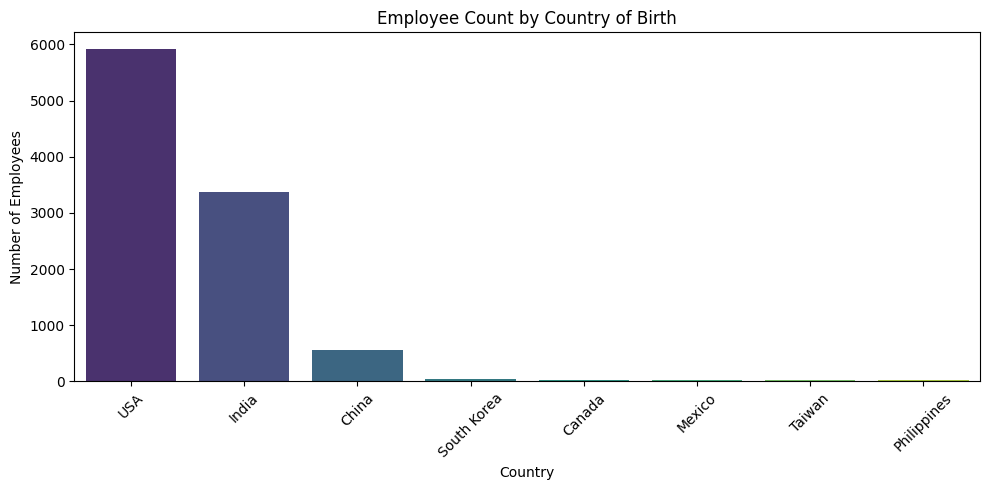

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count_of_birth = emp_df['CountryOfBirth'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=count_of_birth.index, y=count_of_birth.values, palette="viridis")
plt.title('Employee Count by Country of Birth')
plt.xlabel('Country')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-8-8302cdaafd56>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_of_employees.index, y=count_of_employees.values, palette="viridis")


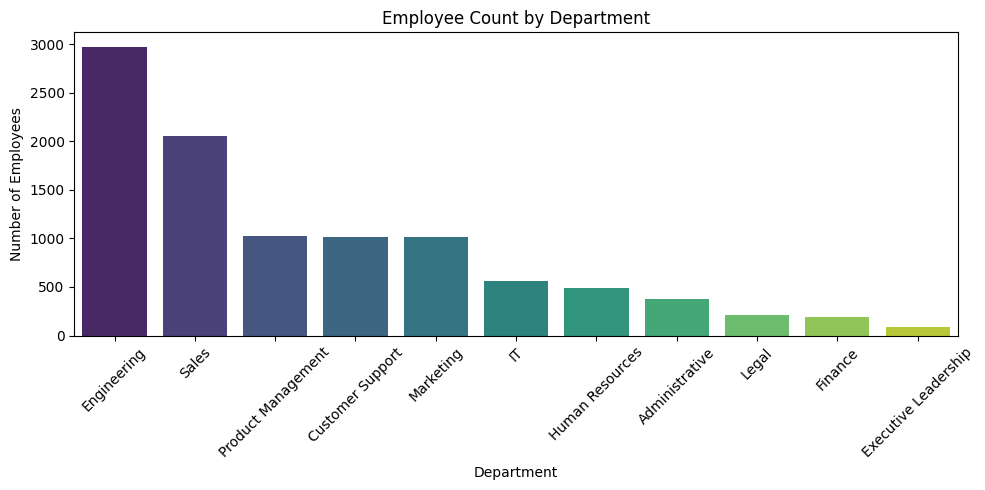

In [ ]:
count_of_employees = emp_df['department'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=count_of_employees.index, y=count_of_employees.values, palette="viridis")
plt.title('Employee Count by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

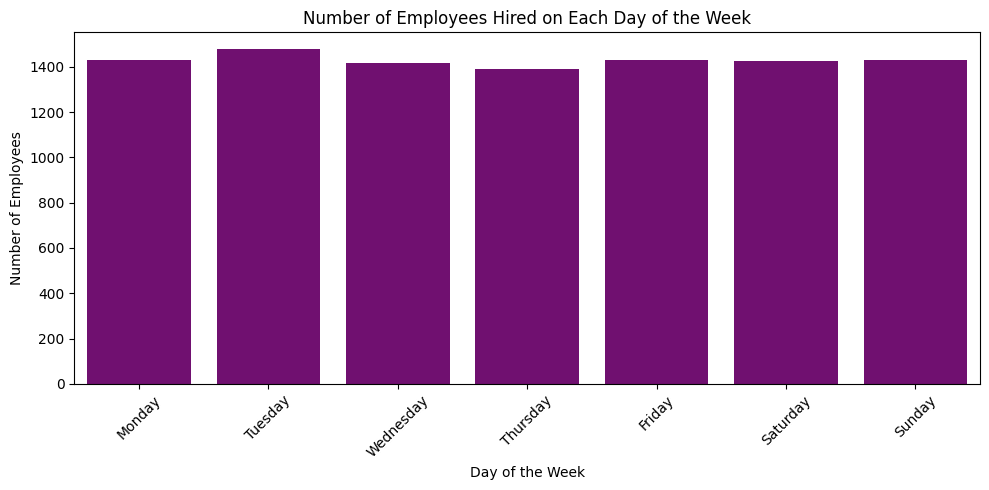

In [ ]:

emp_df['hiredate'] = pd.to_datetime(emp_df['hiredate'])

emp_df['hire_day'] = emp_df['hiredate'].dt.day_name()
hire_day_counts = emp_df['hire_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=hire_day_counts.index, y=hire_day_counts.values, color="purple")
plt.title('Number of Employees Hired on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

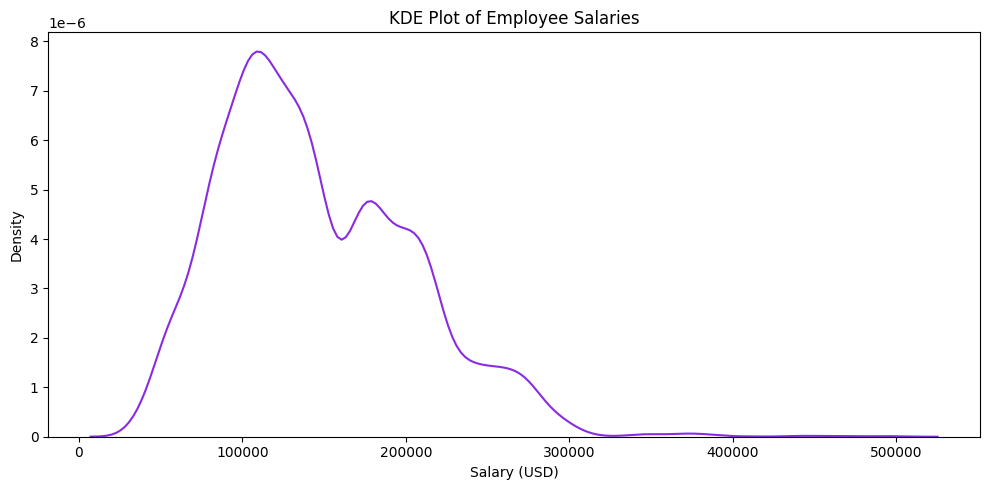

In [ ]:
emp_df['salary'] = pd.to_numeric(emp_df['salary'], errors='coerce')

plt.figure(figsize=(10, 5))
sns.kdeplot(data=emp_df, x="salary", color="#8A2BE2")
plt.title("KDE Plot of Employee Salaries")
plt.xlabel("Salary (USD)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

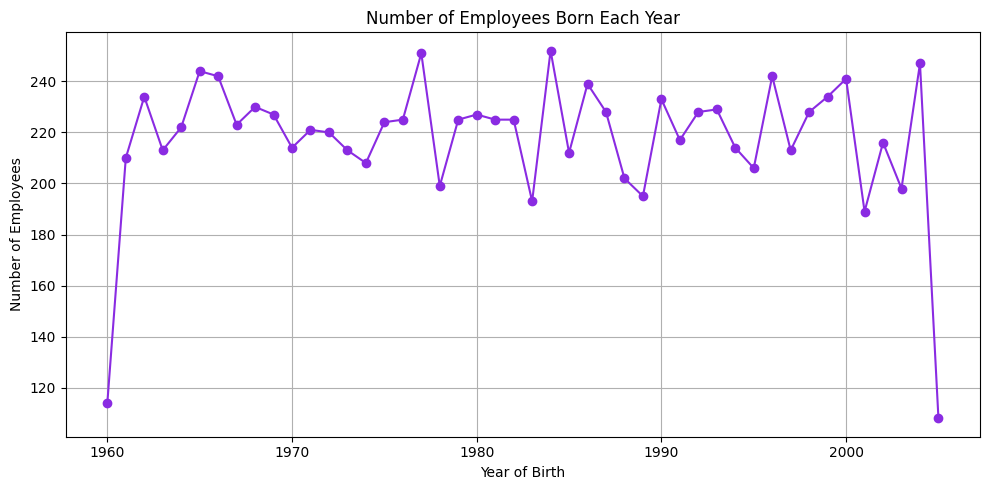

In [ ]:
emp_df['birthdate'] = pd.to_datetime(emp_df['birthdate'])
emp_df['birth_year'] = emp_df['birthdate'].dt.year

birth_year_counts = emp_df['birth_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(birth_year_counts.index, birth_year_counts.values, marker='o', color="#8A2BE2")
plt.title("Number of Employees Born Each Year")
plt.xlabel("Year of Birth")
plt.ylabel("Number of Employees")
plt.grid(True)
plt.tight_layout()
plt.show()

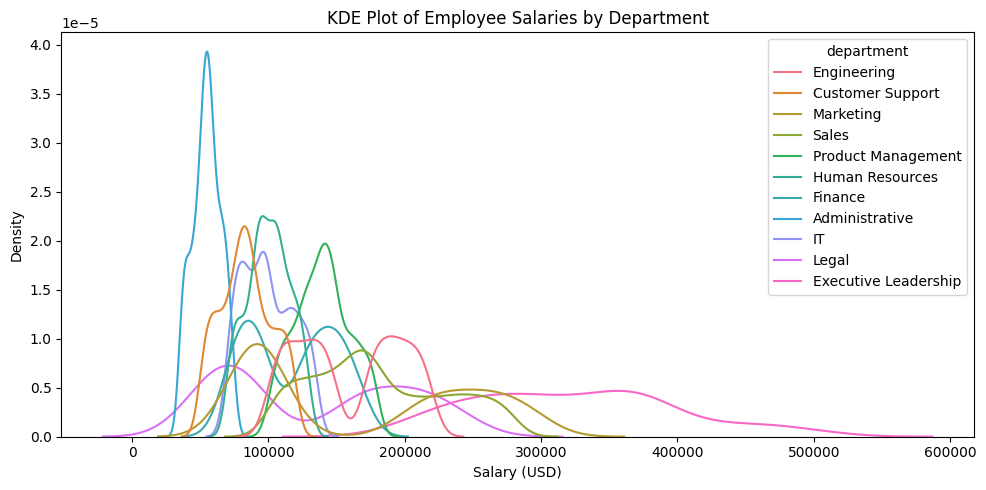

In [ ]:
emp_df['salary'] = pd.to_numeric(emp_df['salary'], errors='coerce')

plt.figure(figsize=(10, 5))
sns.kdeplot(data=emp_df, x="salary", hue="department", common_norm=False)
plt.title("KDE Plot of Employee Salaries by Department")
plt.xlabel("Salary (USD)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [ ]:
print(emp_df.columns)


Index(['employeeID', 'CountryOfBirth', 'name', 'phone', 'email', 'gender',
       'birthdate', 'hiredate', 'department', 'role', 'salary', 'SSID',
       'hire_day', 'birth_year'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np

from datetime import datetime
current_year = datetime.now().year

emp_df['age'] = current_year - emp_df['birth_year']


weights = np.where((emp_df['age'] >= 40) & (emp_df['age'] <= 49), 3, 1)

smpl_df = emp_df.sample(n=500, weights=weights, random_state=42)


In [ ]:
print(smpl_df.describe(include='all'))

          employeeID CountryOfBirth              name                  phone  \
count   5.000000e+02            500               500                    500   
unique           NaN              5               498                    500   
top              NaN            USA  Zachary Williams  +1-926-415-4101x09324   
freq             NaN            304                 2                      1   
mean    1.000050e+08            NaN               NaN                    NaN   
min     1.000000e+08            NaN               NaN                    NaN   
25%     1.000025e+08            NaN               NaN                    NaN   
50%     1.000052e+08            NaN               NaN                    NaN   
75%     1.000076e+08            NaN               NaN                    NaN   
max     1.000099e+08            NaN               NaN                    NaN   
std     2.971157e+03            NaN               NaN                    NaN   

                      email gender     

In [ ]:
print(smpl_df.head(10))

      employeeID CountryOfBirth               name                  phone  \
3780   100003780          China                 郭宁          (680)786-8574   
9490   100009490            USA      Monica Jordan           646-650-8817   
7355   100007355            USA   Matthew Martinez       001-221-876-9143   
5999   100005999            USA  Jennifer Robinson          (390)825-6401   
1574   100001574            USA      Allison Brown  001-298-982-3198x0956   
594    100000594            USA     James Campbell     (396)953-2940x6933   
8637   100008637          India         Anvi Banik           345.717.7011   
6024   100006024            USA         Amy Morgan     204.813.2866x23589   
7104   100007104            USA       Monique Wood    +1-371-498-3921x046   
215    100000215          China                 李杰  +1-828-840-2917x07544   

                           email     gender  birthdate   hiredate  \
3780      courtney74@example.org     female 1971-02-14 2025-03-18   
9490    mariae

In [ ]:
import numpy as np

np.random.seed(42)

salary_std = emp_df['salary'].std()
noise = np.random.normal(loc=0, scale=0.1 * salary_std, size=emp_df.shape[0])

emp_df['perturbed_salary'] = emp_df['salary'] + noise

prtrb_df = emp_df.copy()
prtrb_df['salary'] = emp_df['perturbed_salary']
prtrb_df.drop(columns=['perturbed_salary'], inplace=True)

std_dev = emp_df['salary'].std() * 0.1


In [ ]:
print(prtrb_df.describe(include='all'))

          employeeID CountryOfBirth        name              phone  \
count   1.000000e+04          10000       10000              10000   
unique           NaN              8        9702              10000   
top              NaN            USA  John Smith  (765)397-8068x190   
freq             NaN           5918           6                  1   
mean    1.000050e+08            NaN         NaN                NaN   
min     1.000000e+08            NaN         NaN                NaN   
25%     1.000025e+08            NaN         NaN                NaN   
50%     1.000050e+08            NaN         NaN                NaN   
75%     1.000075e+08            NaN         NaN                NaN   
max     1.000100e+08            NaN         NaN                NaN   
std     2.886896e+03            NaN         NaN                NaN   

                     email gender                   birthdate  \
count                10000  10000                       10000   
unique                9783   

In [ ]:
print(prtrb_df.head(10))

   employeeID CountryOfBirth             name                   phone  \
0   100000000          India      Ganga Dalal      879.711.8022x34058   
1   100000001          India       Forum Gade           (661)270-6527   
2   100000002            USA      Jason Brown     (480)954-3272x69540   
3   100000003            USA   Michael Wright   001-729-579-3402x7501   
4   100000004            USA   Rhonda Vazquez   +1-445-445-4398x99942   
5   100000005          India  Siddharth Badal        001-782-756-8910   
6   100000006            USA     Jenny Thomas  001-268-282-5095x33718   
7   100000007          India   Yuvraj Sanghvi      (856)952-6925x3199   
8   100000008          India      Laksh Bajwa            966-685-1768   
9   100000009          India   Jack Nagarajan            682-772-0718   

                        email     gender  birthdate   hiredate  \
0    williamlewis@example.com     female 1985-02-23 2015-06-30   
1     morganbrett@example.org       male 1998-04-29 2018-09-01  

In [ ]:
!pip install ydata-profiling


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(emp_df, title="Employee Data Profile", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:02<00:00,  6.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]